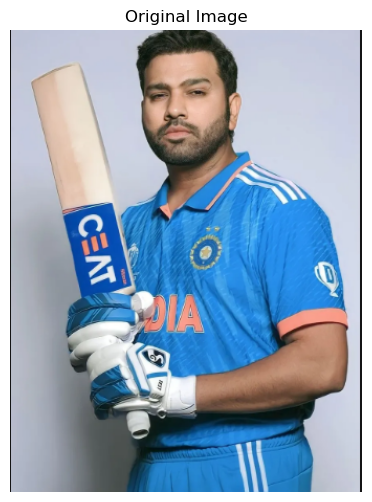

Compressing image to 14 colors...


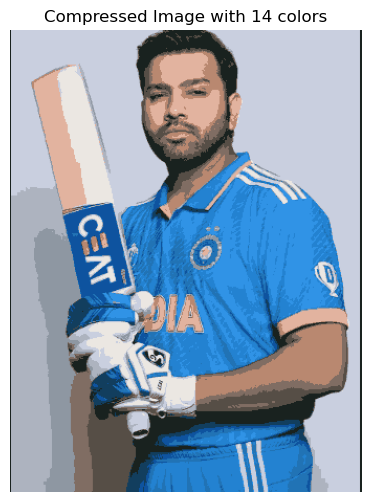

Compressed image saved as compressed_image.jpg
Original image size: 203.89 KB
Compressed image size: 25.04 KB
Compression ratio: 8.14x


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
import os
from PIL import Image


def compress_image(image_path, K=16):
    """
    Compresses an image using K-Means clustering.

    Args:
        image_path (str): Path to the input image.
        K (int): Number of colors/clusters to compress to.

    Returns:
        None
    """

    # 1. Load the image 
    image = io.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
 
    # 2. Reshape image into 2D array of pixels 
    rows, cols, ch = image.shape
    pixels = image.reshape(rows * cols, ch)
 
    # 3. Apply K-Means clustering 
    print(f"Compressing image to {K} colors...")
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(pixels)
 
    # 4. Replace each pixel with centroid color 
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    compressed_pixels = np.clip(compressed_pixels.astype('uint8'), 0, 255)
 
    # 5. Reshape back to image shape 
    compressed_image = compressed_pixels.reshape(rows, cols, ch)
 
    # 6. Show compressed image 
    plt.figure(figsize=(6, 6))
    plt.imshow(compressed_image)
    plt.title(f"Compressed Image with {K} colors")
    plt.axis('off')
    plt.show()
 
    # 7. Save compressed image (RGBA → RGB fix) 
    compressed_image_rgb = Image.fromarray(compressed_image).convert("RGB")
    compressed_path = "compressed_image.jpg"
    compressed_image_rgb.save(compressed_path)
    print(f"Compressed image saved as {compressed_path}")
 
    # 8. Compare file sizes 
    original_size = os.path.getsize(image_path) / 1024  # KB
    compressed_size = os.path.getsize(compressed_path) / 1024  # KB

    print(f"Original image size: {original_size:.2f} KB")
    print(f"Compressed image size: {compressed_size:.2f} KB")
    print(f"Compression ratio: {original_size / compressed_size:.2f}x")

 
# Run PixelShrink 
if __name__ == "__main__":
    image_path = "image.jpg"  # Change to your image file
    K = 14  # Number of colors
    compress_image(image_path, K)